# 1. Demonstração de Utilização do NLTK para Análise de Text

## 1.1 Importação da Biblioteca NLTK

In [1]:
import nltk
from nltk.corpus import floresta
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk import NaiveBayesClassifier, accuracy, precision, recall
import random
from nltk import FreqDist


nltk.download('floresta')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # Baixa os recursos para análise gramatical

[nltk_data] Downloading package floresta to
[nltk_data]     C:\Users\cacoc\AppData\Roaming\nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cacoc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cacoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacoc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 1.2 Carregamento e Processamento de Texto

In [2]:
# Exemplo de uso do corpus em português
sentences = floresta.tagged_sents()

# Tokenização e POS tagging em português
texto = "A NLTK é uma biblioteca poderosa para processamento de linguagem natural."
tokens = word_tokenize(texto.lower(), language='portuguese')

# Remoção de stopwords
stop_words = set(stopwords.words('portuguese'))
tokens_filtrados = [word for word in tokens if word.isalnum() and word not in stop_words]

# Frequência das palavras
frequencia = Counter(tokens_filtrados)

print("Exemplo de frases anotadas:", sentences[:5])
print()
print("Tokens:", tokens)
print()
print("Tokens após remoção de stopwords:", tokens_filtrados)
print()
print("Frequência das palavras:", frequencia)

Exemplo de frases anotadas: [[('Um', '>N+art'), ('revivalismo', 'H+n'), ('refrescante', 'N<+adj')], [('O', '>N+art'), ('7_e_Meio', 'H+prop'), ('é', 'P+v-fin'), ('um', '>N+art'), ('ex-libris', 'H+n'), ('de', 'H+prp'), ('a', '>N+art'), ('noite', 'H+n'), ('algarvia', 'N<+adj'), ('.', '.')], [('É', 'P+v-fin'), ('uma', 'H+num'), ('de', 'H+prp'), ('as', '>N+art'), ('mais', '>A+adv'), ('antigas', 'H+adj'), ('discotecas', 'H+n'), ('de', 'H+prp'), ('o', '>N+art'), ('Algarve', 'H+prop'), (',', ','), ('situada', 'P+v-pcp'), ('em', 'H+prp'), ('Albufeira', 'P<+prop'), (',', ','), ('que', 'SUBJ+pron-indp'), ('continua', 'AUX+v-fin'), ('a', 'PRT-AUX<+prp'), ('manter', 'MV+v-inf'), ('os', '>N+art'), ('traços', 'H+n'), ('decorativos', 'N<+adj'), ('e', 'CO+conj-c'), ('as', '>N+art'), ('clientelas', 'H+n'), ('de', 'H+prp'), ('sempre', 'P<+adv'), ('.', '.')], [('É', 'P+v-fin'), ('um_pouco', 'ADVL+adv'), ('a', '>N+art'), ('versão', 'H+n'), ('de', 'H+prp'), ('uma', '>N+art'), ('espécie', 'H+n'), ('de', 'H+p

# 2. Treinando um Modelo de Classificação Usando NLTK

## 2.1 Definição do Conjunto de Dados de Exemplo
Vamos criar um conjunto de dados de exemplo para classificação de texto. Neste caso, usaremos frases rotuladas como "positivas" ou "negativas".

In [3]:
dados = [
    ("Eu adoro esse filme, é incrível!", "positivo"),
    ("Que experiência terrível, não gostei nada.", "negativo"),
    ("O serviço foi excelente e muito rápido.", "positivo"),
    ("Não recomendo este produto, muito ruim.", "negativo"),
    ("Que dia maravilhoso!", "positivo"),
    ("Estou muito decepcionado com o atendimento.", "negativo"),
    ("A atuação dos atores foi impressionante.", "positivo"),
    ("O filme foi uma grande decepção, não valeu a pena.", "negativo"),
    ("Adorei o ambiente do restaurante, muito aconchegante.", "positivo"),
    ("A comida estava fria e sem sabor.", "negativo"),
    ("O produto chegou antes do prazo e em perfeito estado.", "positivo"),
    ("A embalagem veio danificada e o produto quebrado.", "negativo"),
    ("O atendimento ao cliente foi muito atencioso e prestativo.", "positivo"),
    ("Fiquei horas esperando e ninguém me atendeu.", "negativo"),
    ("O filme me emocionou do começo ao fim.", "positivo"),
    ("Não consigo acreditar que gastei dinheiro com isso.", "negativo"),
    ("A paisagem era deslumbrante, uma experiência única.", "positivo"),
    ("O lugar estava sujo e mal conservado.", "negativo"),
    ("O professor explicou tudo de forma clara e didática.", "positivo"),
    ("A aula foi confusa e não aprendi nada.", "negativo"),
    ("A equipe foi muito profissional e eficiente.", "positivo"),
    ("O serviço foi péssimo, nunca mais volto aqui.", "negativo"),
    ("O livro é fascinante, não consegui parar de ler.", "positivo"),
    ("A história é chata e previsível.", "negativo"),
    ("A música me deixou com um sorriso no rosto.", "positivo"),
    ("O show foi cancelado sem aviso prévio.", "negativo"),
    ("O filme foi uma obra-prima, recomendo a todos!", "positivo"),
    ("A equipe foi incrivelmente atenciosa e prestativa.", "positivo"),
    ("O produto superou todas as minhas expectativas.", "positivo"),
    ("A comida estava deliciosa e bem preparada.", "positivo"),
    ("O ambiente do lugar é relaxante e agradável.", "positivo"),
    ("A entrega foi rápida e o produto chegou em perfeito estado.", "positivo"),
    ("O livro é inspirador e muito bem escrito.", "positivo"),
    ("A apresentação foi emocionante e envolvente.", "positivo"),
    ("O atendimento foi impecável, voltarei com certeza.", "positivo"),
    ("A experiência foi única e inesquecível.", "positivo"),
    ("O filme foi uma grande decepção, não recomendo.", "negativo"),
    ("O atendimento foi rude e desrespeitoso.", "negativo"),
    ("O produto quebrou logo no primeiro uso.", "negativo"),
    ("A comida estava sem sabor e mal preparada.", "negativo"),
    ("O lugar estava lotado e barulhento.", "negativo"),
    ("A entrega atrasou e o produto veio danificado.", "negativo"),
    ("O livro é confuso e mal estruturado.", "negativo"),
    ("A apresentação foi monótona e sem graça.", "negativo"),
    ("O atendimento foi péssimo, nunca mais volto lá.", "negativo"),
    ("A experiência foi frustrante e desorganizada.", "negativo"),
    ("O filme foi emocionante e cheio de reviravoltas.", "positivo"),
    ("Adorei o atendimento, foram muito prestativos e educados.", "positivo"),
    ("O produto é de alta qualidade e superou minhas expectativas.", "positivo"),
    ("A comida estava incrível, saborosa e bem apresentada.", "positivo"),
    ("O ambiente do lugar é acolhedor e relaxante.", "positivo"),
    ("A entrega foi super rápida e o produto chegou em perfeito estado.", "positivo"),
    ("O livro é envolvente e difícil de largar.", "positivo"),
    ("A apresentação foi incrível, cheia de energia e emoção.", "positivo"),
    ("O atendimento foi excelente, recomendo a todos.", "positivo"),
    ("A experiência foi maravilhosa, com certeza voltarei.", "positivo"),
    ("O filme foi uma grande decepção, muito lento e sem graça.", "negativo"),
    ("O atendimento foi horrível, ninguém se importou comigo.", "negativo"),
    ("O produto quebrou no primeiro uso, muito frágil.", "negativo"),
    ("A comida estava fria e sem sabor, não recomendo.", "negativo"),
    ("O lugar estava sujo e desorganizado, péssima experiência.", "negativo"),
    ("A entrega atrasou e o produto veio danificado.", "negativo"),
    ("O livro é confuso e difícil de entender.", "negativo"),
    ("A apresentação foi monótona e sem criatividade.", "negativo"),
    ("O atendimento foi péssimo, nunca mais volto lá.", "negativo"),
    ("A experiência foi frustrante e desorganizada.", "negativo"),
]

# Verificando o tamanho do conjunto de dados
print(f"Total de exemplos: {len(dados)}")

# Embaralhando a lista de dados
random.shuffle(dados)
random.shuffle(dados)
random.shuffle(dados)
random.shuffle(dados)

# Verificando o resultado
print("Dados embaralhados:")
for frase, rotulo in dados:
    print(f"{rotulo}: {frase}")

Total de exemplos: 66
Dados embaralhados:
positivo: O atendimento foi impecável, voltarei com certeza.
negativo: O atendimento foi péssimo, nunca mais volto lá.
positivo: A apresentação foi emocionante e envolvente.
negativo: O lugar estava sujo e mal conservado.
positivo: O livro é envolvente e difícil de largar.
positivo: A comida estava deliciosa e bem preparada.
positivo: Eu adoro esse filme, é incrível!
negativo: O filme foi uma grande decepção, não valeu a pena.
negativo: A entrega atrasou e o produto veio danificado.
negativo: Que experiência terrível, não gostei nada.
positivo: O ambiente do lugar é relaxante e agradável.
negativo: Não recomendo este produto, muito ruim.
positivo: Adorei o ambiente do restaurante, muito aconchegante.
positivo: O produto superou todas as minhas expectativas.
negativo: A experiência foi frustrante e desorganizada.
positivo: A equipe foi incrivelmente atenciosa e prestativa.
positivo: O livro é inspirador e muito bem escrito.
positivo: O livro é f

## 2.2 Pré-processamento dos Dados
Vamos tokenizar as frases e remover stopwords.

In [4]:
def preprocessar(texto):
    tokens = word_tokenize(texto.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

# Aplicando o pré-processamento
dados_processados = [(preprocessar(texto), rotulo) for (texto, rotulo) in dados]
print("Dados processados:", dados_processados)

Dados processados: [(['atendimento', 'impecável', 'voltarei', 'certeza'], 'positivo'), (['atendimento', 'péssimo', 'nunca', 'volto', 'lá'], 'negativo'), (['apresentação', 'emocionante', 'envolvente'], 'positivo'), (['lugar', 'sujo', 'mal', 'conservado'], 'negativo'), (['livro', 'envolvente', 'difícil', 'largar'], 'positivo'), (['comida', 'deliciosa', 'bem', 'preparada'], 'positivo'), (['adoro', 'filme', 'incrível'], 'positivo'), (['filme', 'grande', 'decepção', 'valeu', 'pena'], 'negativo'), (['entrega', 'atrasou', 'produto', 'veio', 'danificado'], 'negativo'), (['experiência', 'terrível', 'gostei', 'nada'], 'negativo'), (['ambiente', 'lugar', 'relaxante', 'agradável'], 'positivo'), (['recomendo', 'produto', 'ruim'], 'negativo'), (['adorei', 'ambiente', 'restaurante', 'aconchegante'], 'positivo'), (['produto', 'superou', 'todas', 'expectativas'], 'positivo'), (['experiência', 'frustrante', 'desorganizada'], 'negativo'), (['equipe', 'incrivelmente', 'atenciosa', 'prestativa'], 'positivo

## 2.3 Extração de Características (Bag-of-Words)
Vamos extrair características usando a abordagem Bag-of-Words.

In [5]:
# Criando uma lista de todas as palavras
todas_palavras = [word for (texto, rotulo) in dados_processados for word in texto]
frequencia = FreqDist(todas_palavras)

# Selecionando as palavras mais comuns como características
palavras_caracteristicas = list(frequencia.keys())[:50]

def extrair_caracteristicas(texto):
    palavras = set(texto)
    caracteristicas = {}
    for palavra in palavras_caracteristicas:
        caracteristicas[f"contem({palavra})"] = (palavra in palavras)
    return caracteristicas

# Aplicando a extração de características
base_caracteristicas = [(extrair_caracteristicas(texto), rotulo) for (texto, rotulo) in dados_processados]
print("Base de características:", base_caracteristicas)

Base de características: [({'contem(atendimento)': True, 'contem(impecável)': True, 'contem(voltarei)': True, 'contem(certeza)': True, 'contem(péssimo)': False, 'contem(nunca)': False, 'contem(volto)': False, 'contem(lá)': False, 'contem(apresentação)': False, 'contem(emocionante)': False, 'contem(envolvente)': False, 'contem(lugar)': False, 'contem(sujo)': False, 'contem(mal)': False, 'contem(conservado)': False, 'contem(livro)': False, 'contem(difícil)': False, 'contem(largar)': False, 'contem(comida)': False, 'contem(deliciosa)': False, 'contem(bem)': False, 'contem(preparada)': False, 'contem(adoro)': False, 'contem(filme)': False, 'contem(incrível)': False, 'contem(grande)': False, 'contem(decepção)': False, 'contem(valeu)': False, 'contem(pena)': False, 'contem(entrega)': False, 'contem(atrasou)': False, 'contem(produto)': False, 'contem(veio)': False, 'contem(danificado)': False, 'contem(experiência)': False, 'contem(terrível)': False, 'contem(gostei)': False, 'contem(nada)': Fa

## 2.4 Treinamento do Modelo (Naive Bayes)
Vamos treinar um modelo de classificação Naive Bayes.

In [6]:
from nltk import NaiveBayesClassifier

# Dividindo os dados em treino e teste
tamanho_treino = int(len(base_caracteristicas) * 0.7)
treino = base_caracteristicas[:tamanho_treino]
teste = base_caracteristicas[tamanho_treino:]

# Treinando o modelo
classificador = NaiveBayesClassifier.train(treino)

# 3. Avaliando um Modelo de Classificação Usando NLTK

## 3.1 Avaliação do Modelo
Vamos avaliar o modelo utilizando métricas como acurácia, precisão e recall.

In [7]:
from nltk import accuracy, precision, recall

# Extraindo rótulos verdadeiros e previsões
rotulos_verdadeiros = [rotulo for (caracteristicas, rotulo) in teste]
previsoes = [classificador.classify(caracteristicas) for (caracteristicas, rotulo) in teste]

# Calculando a acurácia
acuracia = accuracy(rotulos_verdadeiros, previsoes)
print("Acurácia:", acuracia)

# Calculando precisão e recall
refsets = {}
testsets = {}

for i, (caracteristicas, rotulo) in enumerate(teste):
    refsets[rotulo] = refsets.get(rotulo, set())
    refsets[rotulo].add(i)
    observed = classificador.classify(caracteristicas)
    testsets[observed] = testsets.get(observed, set())
    testsets[observed].add(i)

# Verificando se as chaves existem antes de calcular precisão e recall para 'positivo'
print("Precisão (positivo):", precision(refsets['positivo'], testsets['positivo']))
print("Recall (positivo):", recall(refsets['positivo'], testsets['positivo']))
# Verificando se as chaves existem antes de calcular precisão e recall para 'negativo'
print("Precisão (negativo):", precision(refsets['negativo'], testsets['negativo']))
print("Recall (negativo):", recall(refsets['negativo'], testsets['negativo']))

Acurácia: 0.55
Precisão (positivo): 0.38461538461538464
Recall (positivo): 0.8333333333333334
Precisão (negativo): 0.8571428571428571
Recall (negativo): 0.42857142857142855


## 3.2 Matriz de Confusão
Vamos gerar uma matriz de confusão para visualizar o desempenho do modelo.

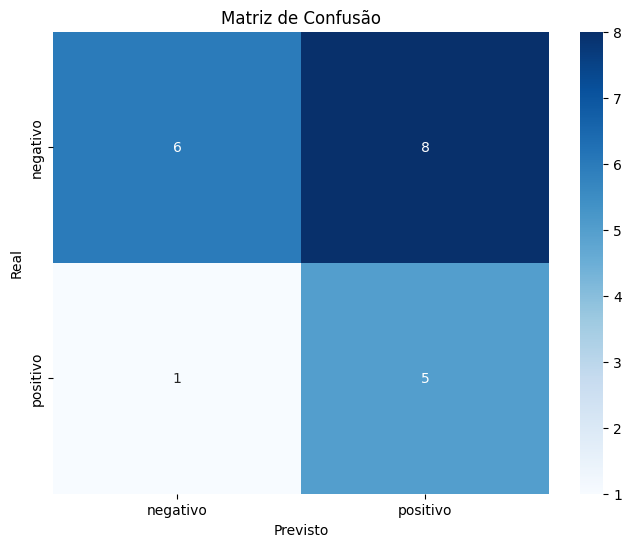

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dados de referência e previsões
esperados = [rotulo for (caracteristicas, rotulo) in teste]
previstos = [classificador.classify(caracteristicas) for (caracteristicas, rotulo) in teste]

# Gerar a matriz de confusão
matriz = confusion_matrix(esperados, previstos, labels=["negativo", "positivo"])

# Criar um heatmap com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=["negativo", "positivo"], yticklabels=["negativo", "positivo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()